# Numpy Benchmark Script
Instructions: Select menu option **Cell**, the **Run All**.

In [2]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

# Author: Markus Beuckelmann
# Sourced from: https://gist.github.com/markus-beuckelmann/8bc25531b11158431a5b09a45abd6276
# Roughly based on: http://stackoverflow.com/questions/11443302/compiling-numpy-with-openblas-integration
# Modified by Eric Flores to capture metrics and add a Bar Chart


from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [22]:
# Let's take the randomness out of random numbers (for reproducibility)
np.random.seed(0)

size = 4096
A, B = np.random.random((size, size)), np.random.random((size, size))
C, D = np.random.random((size * 128,)), np.random.random((size * 128,))
E = np.random.random((int(size / 2), int(size / 4)))
F = np.random.random((int(size / 2), int(size / 2)))
F = np.dot(F, F.T)
G = np.random.random((int(size / 2), int(size / 2)))

#Initialize metrics dictionary
metrics = {}

In [4]:
# Matrix multiplication
N = 20
t = time()
for i in range(N):
    np.dot(A, B)
delta = time() - t
print('Dotted two %dx%d matrices in %0.2f s.' % (size, size, delta / N))
del A, B
metrics['Matrix\nmultiplication\n(seconds)'] = delta / N

Dotted two 4096x4096 matrices in 35.92 s.


In [23]:
# Vector multiplication
N = 5000
t = time()
for i in range(N):
    np.dot(C, D)
delta = time() - t
print('Dotted two vectors of length %d in %0.2f ms.' % (size * 128, 1e3 * delta / N))
del C, D
metrics['Vector\nmultiplication\n(milliseconds)'] = 1e3 * delta / N

Dotted two vectors of length 524288 in 0.69 ms.


In [6]:
# Singular Value Decomposition (SVD)
N = 3
t = time()
for i in range(N):
    np.linalg.svd(E, full_matrices = False)
delta = time() - t
print("SVD of a %dx%d matrix in %0.2f s." % (size / 2, size / 4, delta / N))
del E
metrics['Singular\nValue Decomposition\n(seconds)'] = delta / N

SVD of a 2048x1024 matrix in 4.43 s.


In [24]:
# Cholesky Decomposition
N = 3
t = time()
for i in range(N):
    np.linalg.cholesky(F)
delta = time() - t
print("Cholesky decomposition of a %dx%d matrix in %0.2f s." % (size / 2, size / 2, delta / N))
metrics['Cholesky\nDecomposition\n(seconds)'] = delta / N

Cholesky decomposition of a 2048x2048 matrix in 0.43 s.


In [8]:
# Eigendecomposition
t = time()
for i in range(N):
    np.linalg.eig(G)
delta = time() - t
print("Eigendecomposition of a %dx%d matrix in %0.2f s." % (size / 2, size / 2, delta / N))
metrics['Eigendecomposition\n(seconds)'] = delta / N

Eigendecomposition of a 2048x2048 matrix in 6.16 s.


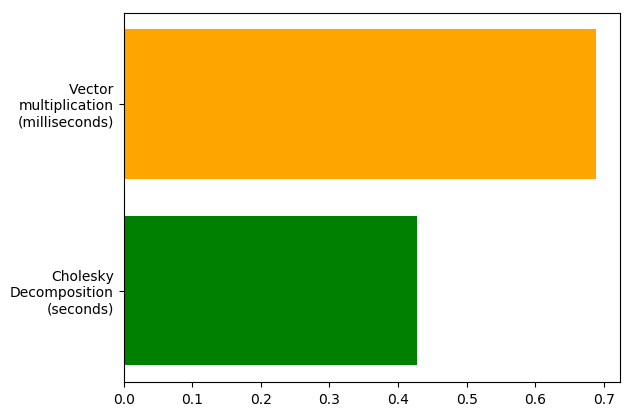

In [25]:
#Added by https://github.com/ericflores
plt.rcdefaults()
fig, ax = plt.subplots()
index_of_bars = np.arange(len(metrics))
labels = list(metrics.keys())
values = list(metrics.values())
colors = ['orange', 'green', 'yellow', 'purple', 'maroon']
ax.barh(index_of_bars, values, color=colors)
ax.set_yticks(index_of_bars)
ax.set_yticklabels(labels)
ax.invert_yaxis()
plt.show()

In [26]:
print('')
print('This was obtained using the following Numpy configuration:')
np.__config__.show()


This was obtained using the following Numpy configuration:
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    library_dirs = ['C:\\projects\\numpy-wheels-jc1cl\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    library_dirs = ['C:\\projects\\numpy-wheels-jc1cl\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    library_dirs = ['C:\\projects\\numpy-wheels-jc1cl\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    library_dirs = ['C:\\projects\\numpy-wheels-jc1cl\\numpy\\build\\openblas']
    libraries = ['openblas']
    language = f77
    define_macros = [('HAVE_CBLAS', None)]
